In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import os
import re
from functools import partial
import json
from collections import defaultdict
import sys
sys.path.append('../')
from src.utils import list_apply

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
tqdm.pandas()

In [5]:
data_path = '../data/processed/'
df = pd.read_pickle(data_path + 'processedv3.pkl')

### Look at samples from each datasource to make sure they look good
| Source | Notes | Num Samples |
| --- | --- | -----|
| | | |
| | | |

In [8]:
df['source'].value_counts()

food               494501
tastykitchen        74969
cookpad             61104
cookeatshare        60498
foodnetwork         52867
allrecipes          47406
epicurious          45249
kraftrecipes        37761
recipeland          25012
foodandwine         17505
cooking.nytimes     17174
foodgeeks            9201
cookstr              8961
myrecipes            6477
chowhound            6277
online-cookbook      5626
vegetariantimes      4574
delish               3819
landolakes           2484
foodrepublic         2321
lovefood             1940
                        1
Name: source, dtype: int64

### List of funny reicpes I've found

In [9]:
# Post covid party idea?? :P
moonshine = df[df['carb_pdv']==df['carb_pdv'].max()]
moonshine

,id,title_lower,source,ingredients,instructions,rating,review,tags,time,url,...,my_total_fat,calories,carb_pdv,protien_pdv,saturated_fat_pdv,sodium_pdv,sugar_pdv,total_fat_pdv,img_list,train
895265,6bff3e3015,tennessee moonshine,food,"[50 lbs cornmeal, 10 lbs natural bran (optiona...",[To boiled cornmeal add yeast and lots of suga...,"[0, 0, 0]",[Now I'm going to have to go to the storage un...,"[30-minutes-or-less, time-to-make, course, pre...",20.0,http://www.food.com/recipe/tennessee-moonshine...,...,12.94,434360.2,360.98,39.61,5.9,13.24,3627.29,12.93,[],True


### What does rating look like?

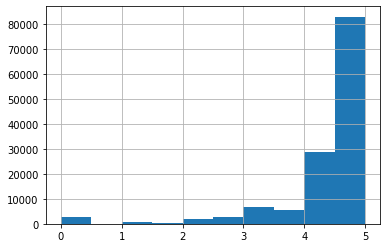

In [11]:
df[~df['rating'].isnull()]['rating'].apply(lambda x: np.mean(x)).hist()
plt.show()